In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
import seaborn as sns


<Axes: >

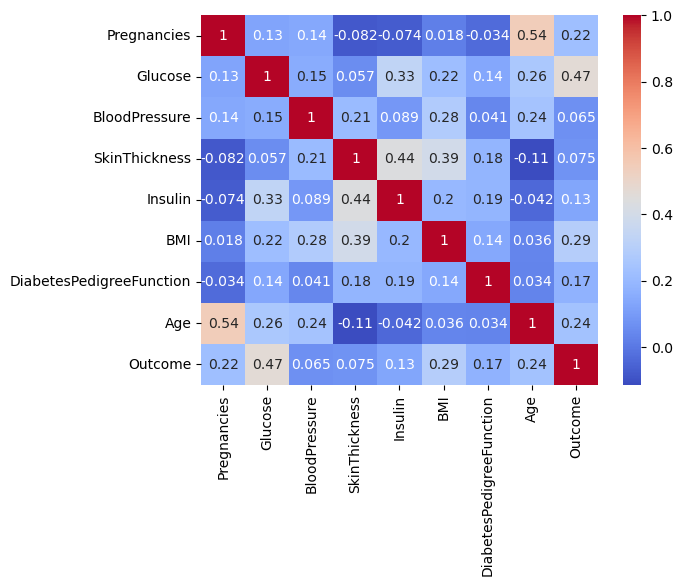

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [18]:
import matplotlib.pyplot as plt

In [35]:
def plot_count(column):
    print(column,"- count")
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Pregnancies - count


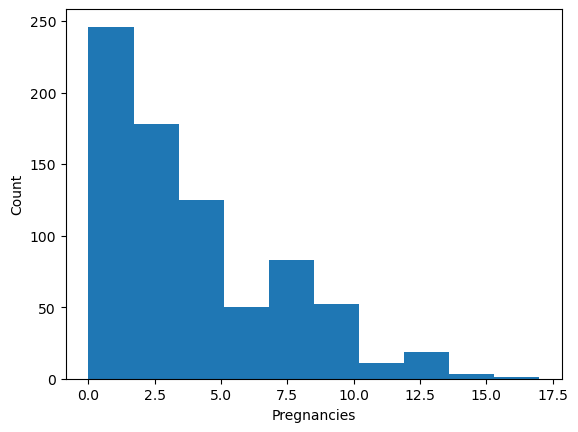

Glucose - count


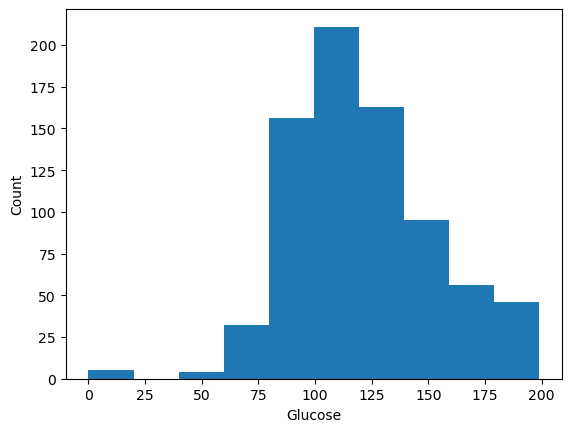

BloodPressure - count


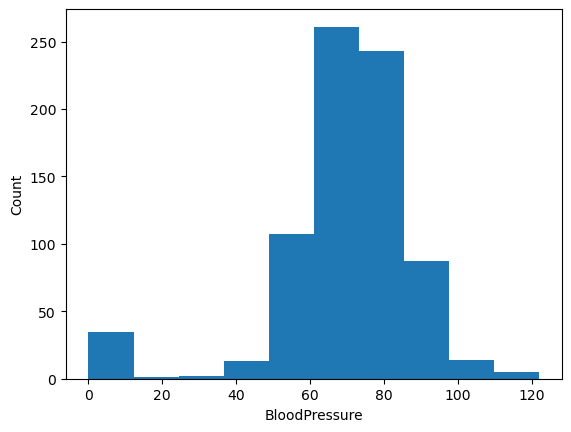

SkinThickness - count


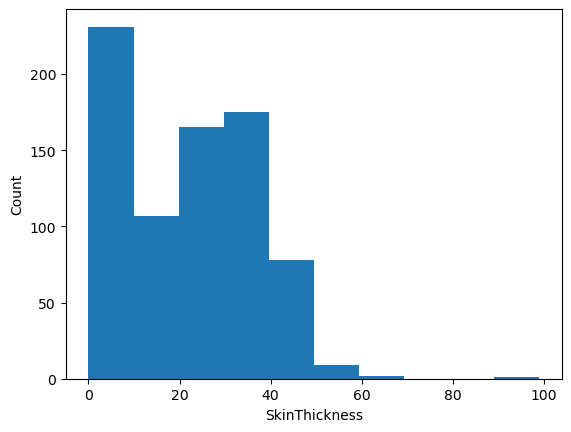

Insulin - count


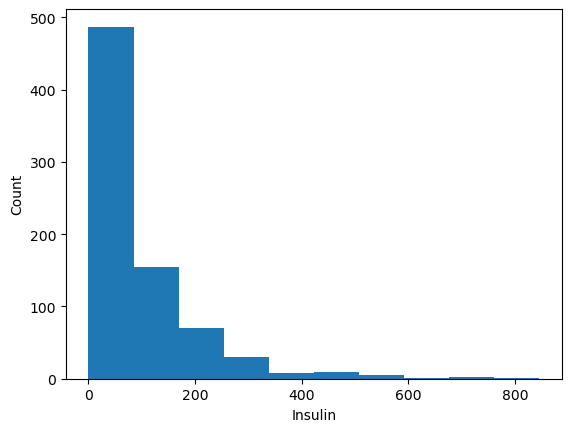

BMI - count


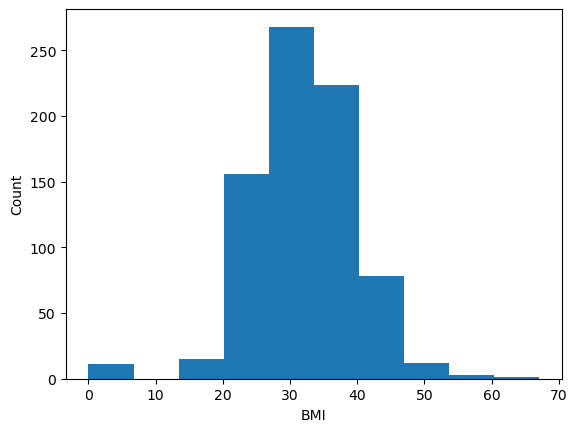

DiabetesPedigreeFunction - count


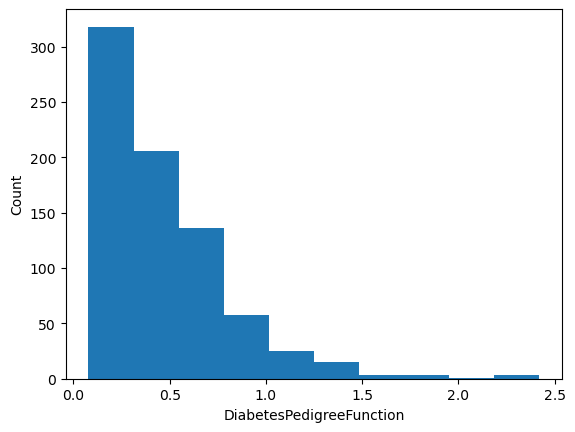

Age - count


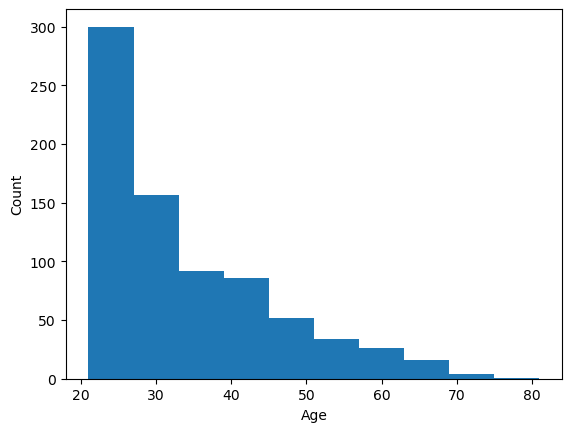

Outcome - count


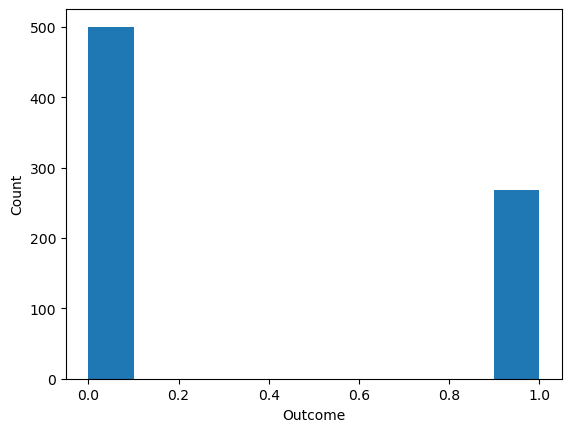

In [36]:
for i in df.columns:
    plot_count(i)

In [52]:
def box_plot(column):
    sns.boxplot(x=column,data=df)
    plt.xlabel(column)
    plt.show()

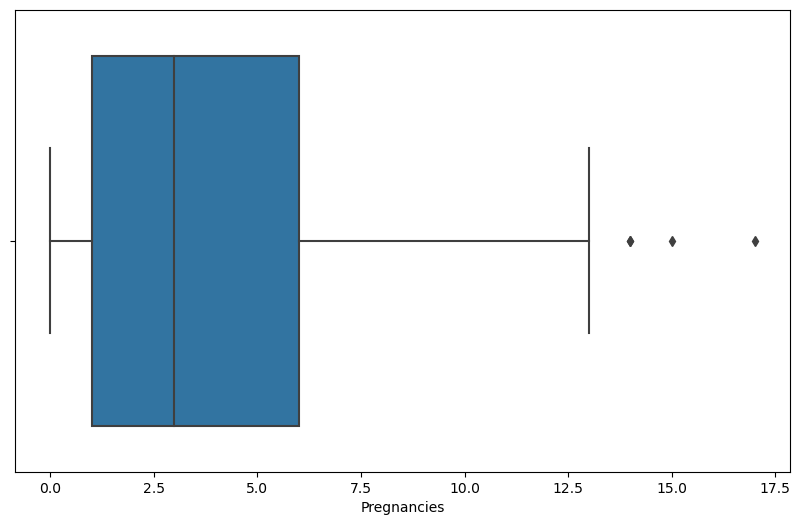

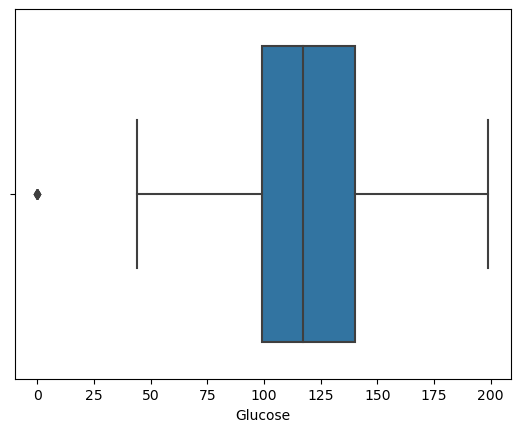

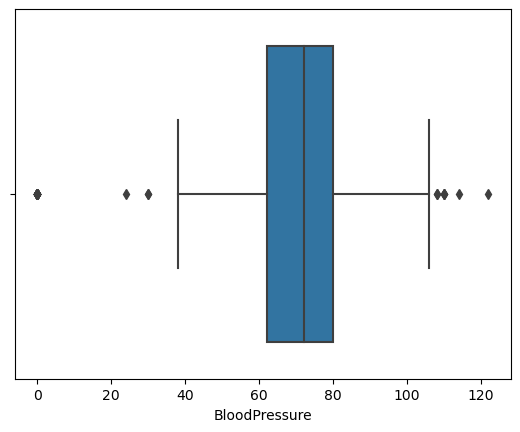

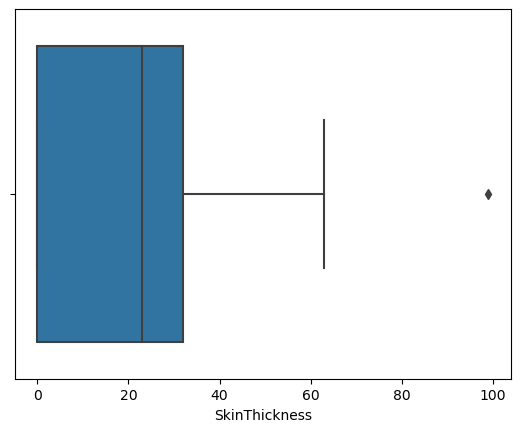

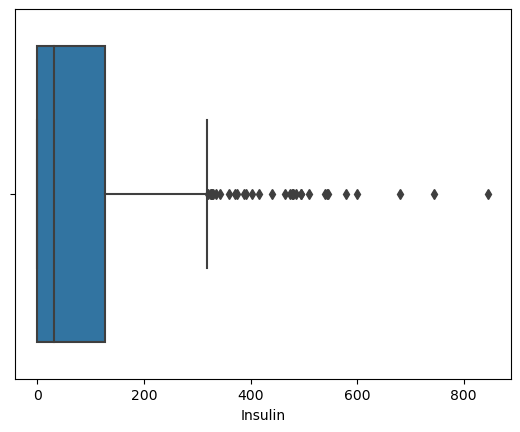

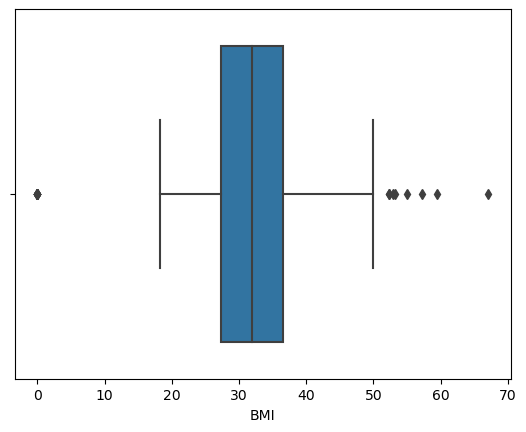

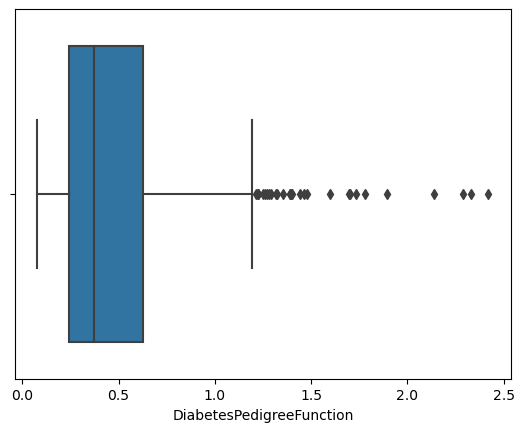

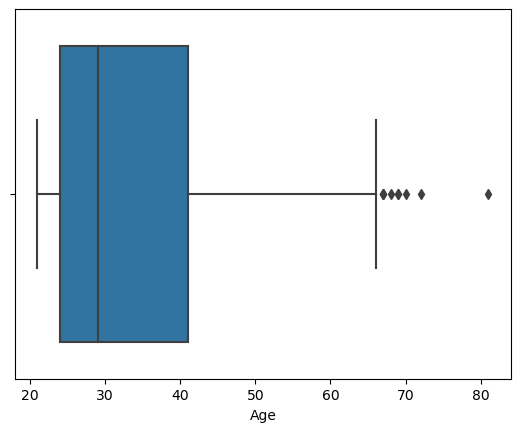

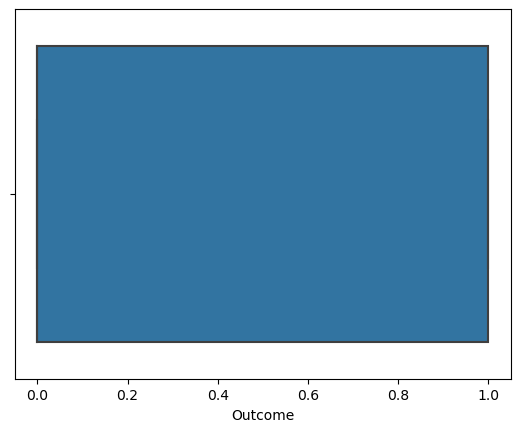

In [53]:
plt.figure(figsize=(10, 6))
for i in df.columns:
    box_plot(i)

In [79]:
quartiles = df.quantile([0.25, 0.75])
q1 = quartiles.loc[0.25]
q3 = quartiles.loc[0.75]
iqr = q3 - q1
alt_sinir = q1 - 1.5 * iqr
ust_sinir = q3 + 1.5 * iqr


In [80]:
new_df = df[((df >= alt_sinir) & (df <= ust_sinir)).all(axis=1)]


In [83]:
df=new_df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [84]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler

In [102]:
sc=StandardScaler()
df["Pregnancies"] = sc.fit_transform(df[["Pregnancies"]])
df["Age"] = sc.fit_transform(df[["Age"]])
df["Glucose"] = sc.fit_transform(df[["Glucose"]])
df["SkinThickness"] = sc.fit_transform(df[["SkinThickness"]])
df["Insulin"] = sc.fit_transform(df[["Insulin"]])
df["BMI"] = sc.fit_transform(df[["BMI"]])
df["DiabetesPedigreeFunction"] = sc.fit_transform(df[["DiabetesPedigreeFunction"]])
df["BloodPressure"] = sc.fit_transform(df[["BloodPressure"]])



C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_20512\2541058322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pregnancies"] = sc.fit_transform(df[["Pregnancies"]])
C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_20512\2541058322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = sc.fit_transform(df[["Age"]])
C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_20512\2541058322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [103]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.702315,1.048992,0.013541,0.938277,-0.837082,0.258472,0.908573,1.686420,1
1,-0.849075,-1.155696,-0.531964,0.545883,-0.837082,-0.830568,-0.283229,-0.110519,0
2,1.322871,2.273819,-0.713799,-1.350686,-0.837082,-1.343972,1.102889,-0.015943,1
3,-0.849075,-1.015716,-0.531964,0.153489,0.399593,-0.597202,-1.077765,-1.056276,0
5,0.392037,-0.070849,0.195376,-1.350686,-0.837082,-0.986145,-0.930948,-0.205095,0
...,...,...,...,...,...,...,...,...,...
763,1.943426,-0.595775,0.377211,1.788463,1.531019,0.149568,-1.060492,2.915904,0
764,-0.538797,0.139121,-0.168294,0.415085,-0.837082,0.756318,-0.330729,-0.488822,0
765,0.392037,0.104126,0.013541,0.153489,0.636403,-0.892798,-0.740951,-0.205095,0
766,-0.849075,0.279101,-1.077468,-1.350686,-0.837082,-0.286048,-0.291866,1.402692,1


In [111]:
y=df.iloc[:,8].values
X=df.iloc[:,0:8].values

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

svm_model=SVC()
xtrain,xtest_val,ytrain,ytest_val=train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y)

In [115]:
xval,xtest,yval,ytest=train_test_split(xtest_val,ytest_val,test_size=0.5,shuffle=True,stratify=ytest_val)

In [116]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(xval, yval)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [119]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.7818713450292397


In [120]:
yhead_test_all=grid_search.predict(xtest_val)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(ytest_val,yhead_test_all)

0.7554347826086957

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [126]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8055266757865936


In [128]:
yhead_test_all=grid_search.predict(xtest_val)
print(accuracy_score(ytest_val,yhead_test_all))

0.7663043478260869


In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
gnb_model = GaussianNB()
gnb_model.fit(xtrain, ytrain)


GaussianNB()

In [131]:
y_pred = gnb_model.predict(xtest_val)
accuracy = accuracy_score(ytest_val, y_pred)
print("Test verisi doğruluk skoru: ", accuracy)

Test verisi doğruluk skoru:  0.7445652173913043


In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn_model=KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,10)}  
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(xval, yval)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [135]:
grid_search.best_params_

{'n_neighbors': 9}

In [137]:
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [138]:
y_pred = knn_model.predict(xtest_val)
accuracy = accuracy_score(ytest_val, y_pred)
print("Test verisi doğruluk skoru: ", accuracy)

Test verisi doğruluk skoru:  0.75
